# Interpolacija splajnovima

U sljedećoj prezentaciji uvodimo splajnove i nakon toča obrađujemo najjednostavniji tip splajnova a to je linearan splajn. Za početak iskoristimo već implementirane funkcije iz biblioteke *scipy*. Koristit ćemo paket *interpolate*. 
Za detalje možete pogledati [ovaj link](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

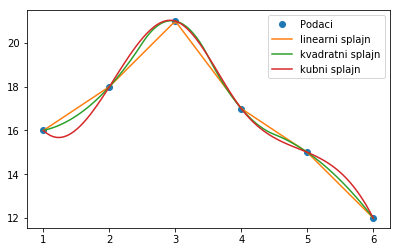

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

x=np.array([1 ,2 , 3, 4, 5 , 6])
y=np.array([16,18,21, 17, 15, 12])


y_linear  = interp1d(x, y)
y_quadratic = interp1d(x, y, kind='quadratic')
y_cubic   = interp1d(x, y, kind='cubic')


fig = plt.subplots(figsize=(6.5, 4))   
x2 = np.linspace(1, 6, 100)
plt.plot(x, y, 'o', label='Podaci')
plt.plot(x2, y_linear(x2), label='linearni splajn')
plt.plot(x2, y_quadratic(x2), label='kvadratni splajn')
plt.plot(x2, y_cubic(x2), label='kubni splajn')
plt.legend(loc='upper right')
plt.savefig("splajn.png")


# Linearni splajn
Sada ćemo pokazati primjer interpolacije linearnim splajnom za podatke 
$$\begin{array}{c||c|c|c|c|c} x_i& 0& 2& 3& 5 & 7\\ \hline y_i &1 & 5& 3& 4& 1\end{array}$$

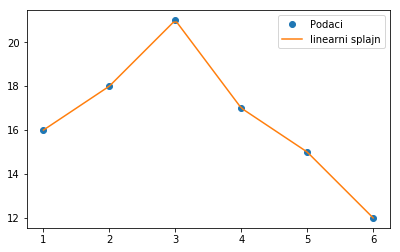

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
x = np.array([1 ,2 , 3, 4, 5 , 6])
y = np.array([16,18,21, 17, 15, 12])
y_linear  = interp1d(x, y)
fig = plt.subplots(figsize=(6.5, 4))   
x2 = np.linspace(1, 6, 100)
plt.plot(x, y, 'o', label='Podaci')
plt.plot(x2, y_linear(x2), label='linearni splajn')
plt.legend(loc='upper right')
plt.savefig("linearnisplajn.png")

# Konstrukcija prirodnog kubnog splajna

*Literatura po kojoj je izrađen dio predavanja: Jan Kiussalas: Numerical methods in engineering with Python, Cambridge University press.*


Bit će nam potrebne funkcije za rješavanje sustava sa trodijagonalnom matricom

In [8]:
def LUdecomptridiagonal(a,b,c):
    n=len(b)
    for k in range(1,n):
        mu=a[k-1]/b[k-1]
        b[k]=b[k]-mu*c[k-1]
        a[k-1]=mu
    return a,b,c

def LUsolvetridiagonal(a,b,c,f):
    n=len(b)
    for k in range(1,n):
        f[k]=f[k]-a[k-1]*f[k-1]
    f[n-1]=f[n-1]/b[n-1]
    for k in range(n-2,-1,-1):
        f[k]=(f[k]-c[k]*f[k+1])/b[k]
    return f


U sljedećoj funkciji računamo koeficijente $\gamma$ za prirodni kubični splajn koji interpolira podatke x i y.

In [9]:
def gamma_calc(x,y):
    n = len(x)-1
    l_diag = np.zeros(n)
    m_diag = np.ones(n+1)
    u_diag = np.zeros(n)
    gamma = np.zeros(n+1)
    l_diag[0:n-1] = x[0:n-1]-x[1:n]
    m_diag[1:n] = 2.0*(x[0:n-1]-x[2:n+1])
    u_diag[1:n] = x[1:n]-x[2:n+1]
    gamma[1:n] =6.0*(y[0:n-1]-y[1:n])/l_diag[0:n-1]-6.0*(y[1:n] - y[2:n+1])/u_diag[1:n]
    LUdecomptridiagonal(l_diag,m_diag,u_diag)
    LUsolvetridiagonal(l_diag,m_diag,u_diag,gamma)
    return gamma

Sljedeća funkcija za danu ulaznu vrijednost xp nalazi interval u kojem se nalazi, te računa vrijednost kubnog splajna u toj točki.

In [11]:
def evalSpline(x,y,gamma,xp):
    def findSegment(x,xp):
        iLeft = 0
        iRight = len(x)- 1
        while 1:
            if (iRight-iLeft)<= 1: return iLeft
            i =int((iLeft + iRight)/2)
            if xp < x[i]: iRight = i
            else: iLeft = i
    i = findSegment(x,xp)
    h = x[i] - x[i+1]
    s = ((xp - x[i+1])**3/h - (xp - x[i+1])*h)*gamma[i]/6.0
    s = s- ((xp - x[i])**3/h - (xp - x[i])*h)*gamma[i+1]/6.0 
    s =  s + (y[i]*(xp - x[i+1])- y[i+1]*(xp - x[i]))/h
    return s

Za dane ulazne vrijednosti koje interpoliramo izračunat ćemo vrijednost kubnog splajna u točki 1.5

In [13]:
x=np.array([1 ,2 , 3, 4, 5])
y=np.array([0,1, 0, 1, 0])
gamma=gamma_calc(x,y)
print("Vrijednost u točki x=1.5 je", evalSpline(x,y,gamma,1.5))

Vrijednost u točki x=1.5 je 0.7678571428571428
